In [2]:
library(nnet)
library("dplyr")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
doc = '
input,output
0.015,0.500912724
0.11,0.297571962
0.205,0.218176008
0.3,0.19291396
0.395,0.329506764
0.49,0.456520966
0.585,0.672476834
0.68,0.766769393
0.775,0.852478107
0.87,0.704861326
0.965,0.570437662
0.025,0.45306966
0.05,0.407294902
0.075,0.36380285
0.1,0.323664424
0.125,0.287867966
0.15,0.257294902
0.175,0.232698043
0.2,0.214683045
0.225,0.203693498
0.25,0.2
0.275,0.203693498
0.3,0.214683045
0.325,0.232698043
0.35,0.257294902
0.375,0.287867966
0.4,0.323664424
0.425,0.36380285
0.45,0.407294902
0.475,0.45306966
0.5,0.5
0.525,0.54693034
0.55,0.592705098
0.575,0.63619715
0.6,0.676335576
0.625,0.712132034
0.65,0.742705098
0.675,0.767301957
0.7,0.785316955
0.725,0.796306502
0.75,0.8
0.775,0.796306502
0.8,0.785316955
0.825,0.767301957
0.85,0.742705098
0.875,0.712132034
0.9,0.676335576
0.925,0.63619715
0.95,0.592705098
0.975,0.54693034
'
table = read.csv(text = doc, header = T)
head(table)

input,output
0.015,0.5009127
0.110,0.2975720
0.205,0.2181760
0.300,0.1929140
0.395,0.3295068
0.490,0.4565210


In [4]:
train = slice(table, 1:11)
valid = slice(table, 12:nrow(table))

# weights:  13
initial  value 0.604709 
iter  10 value 0.215698
iter  20 value 0.058748
iter  30 value 0.039696
iter  40 value 0.028535
iter  50 value 0.014460
iter  60 value 0.007038
iter  70 value 0.005590
iter  80 value 0.005459
iter  90 value 0.005430
iter 100 value 0.005332
final  value 0.005332 
stopped after 100 iterations


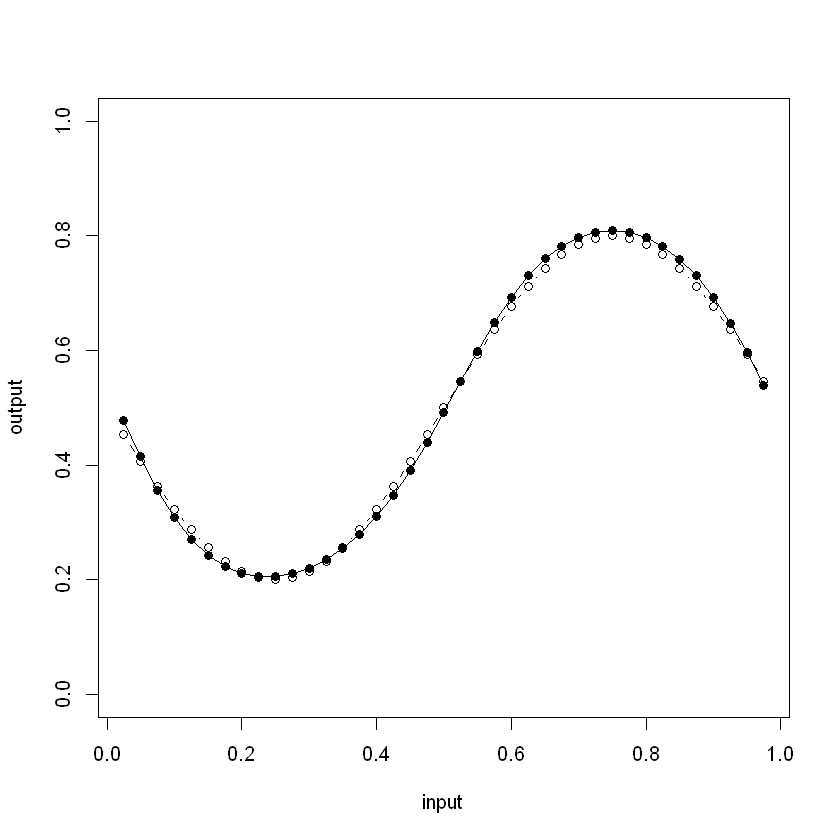

In [10]:
result = nnet(output~input, data = train, size = 4, maxit = 100) # 中間層の大きさ４、イテレーション100回
pred = predict(result, valid, type = "raw") # row = 回帰 class = 分類
plot(valid, type = "b", ylim = c(0,1))
points(valid$input, pred, pch = 16)
lines(valid$input, pred)

# weights:  4
initial  value 0.737259 
iter  10 value 0.503467
iter  20 value 0.185624
iter  30 value 0.168701
iter  40 value 0.146313
iter  50 value 0.129268
iter  60 value 0.127349
iter  70 value 0.122644
iter  80 value 0.120034
iter  90 value 0.111641
iter 100 value 0.110746
final  value 0.110746 
stopped after 100 iterations


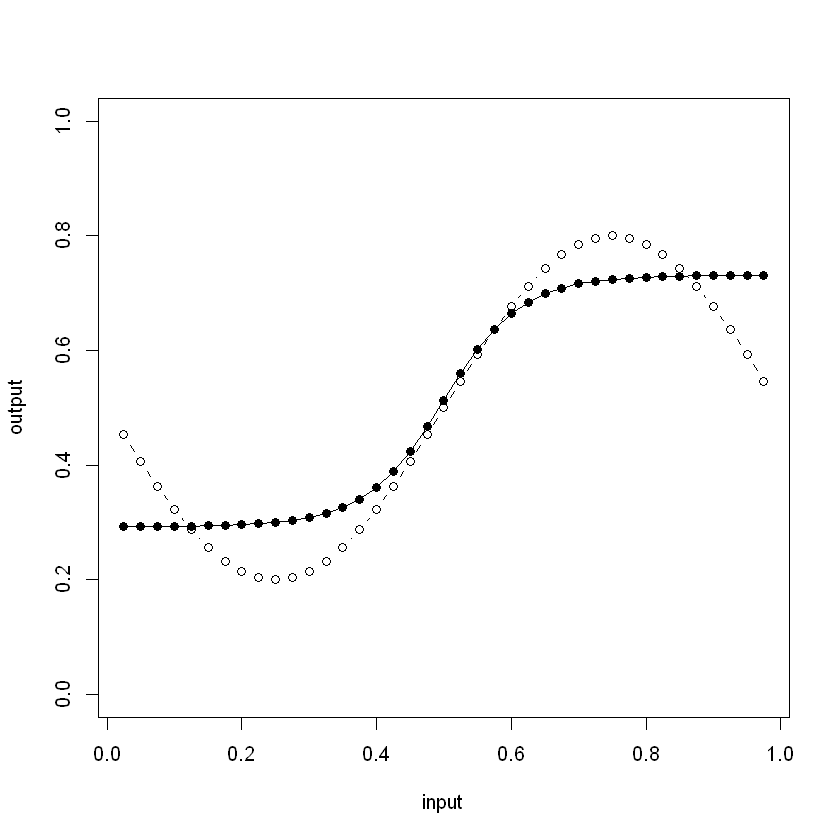

In [21]:
result = nnet(output~input, data = train, size = 1, maxit = 100) # 中間層の大きさ1、イテレーション100回
pred = predict(result, valid, type = "raw") # row = 回帰 class = 分類
plot(valid, type = "b", ylim = c(0,1))
points(valid$input, pred, pch = 16)
lines(valid$input, pred)